## Data

In [ ]:
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(5 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
data = np.column_stack((X, y))  # Combine X and y to form the dataset

# Data represented by (X,y)

## DB Scan

In [ ]:
from collections import deque
import matplotlib.pyplot as plt

def calculate_distances(X):
  """
  Calculate the pairwise Euclidean distances between all points in the dataset.

  Parameters:
  X (numpy.ndarray): The input data array of shape (n_samples, n_features).

  Returns:
  numpy.ndarray: A distance matrix of shape (n_samples, n_samples) where each element (i, j)
                  represents the Euclidean distance between points i and j.
  """
  return np.sqrt(((X[:, np.newaxis] - X) ** 2).sum(axis=2))


class DBSCAN:
    def __init__(self, r, minPts):
        self.r = r
        self.minPts = minPts

    def fit(self, X):
        n = X.shape[0]
        labels = np.full(n, -1, dtype=object)  # Initialize labels as -1 (unclassified)
        cluster_id = 0

        # Calculate distances between points
        distances = calculate_distances(X)

        # Step 1: Identify core points and expand clusters
        for point_idx in range(n):
            if labels[point_idx] != -1:
                continue  # Skip already classified points

            neighbors = self.region_query(point_idx, distances)
            if len(neighbors) < self.minPts:
                labels[point_idx] = (-1, 'outlier')  # Mark as outlier initially
            else:
                cluster_id += 1
                self.expand_cluster(labels, point_idx, neighbors, cluster_id, distances)

        return labels

    def region_query(self, point_idx, distances):
        neighbors = np.where(distances[point_idx] <= self.r)[0]
        return neighbors

    def expand_cluster(self, labels, core_point, neighbors, cluster_id, distances):
        labels[core_point] = (cluster_id, 'core')  # Assign the core point to the current cluster
        search_queue = deque(neighbors)

        while search_queue:
            point_idx = search_queue.popleft()
            if labels[point_idx] == (-1, 'outlier'):  # If it was previously marked as outlier
                labels[point_idx] = (cluster_id, 'border')  # Change outlier to border point
            if labels[point_idx] != -1:
                continue  # Skip already classified points

            labels[point_idx] = (cluster_id, 'border')  # Assign the point to the current cluster

            point_neighbors = self.region_query(point_idx, distances)
            if len(point_neighbors) >= self.minPts:
                labels[point_idx] = (cluster_id, 'core')
                search_queue.extend(point_neighbors)

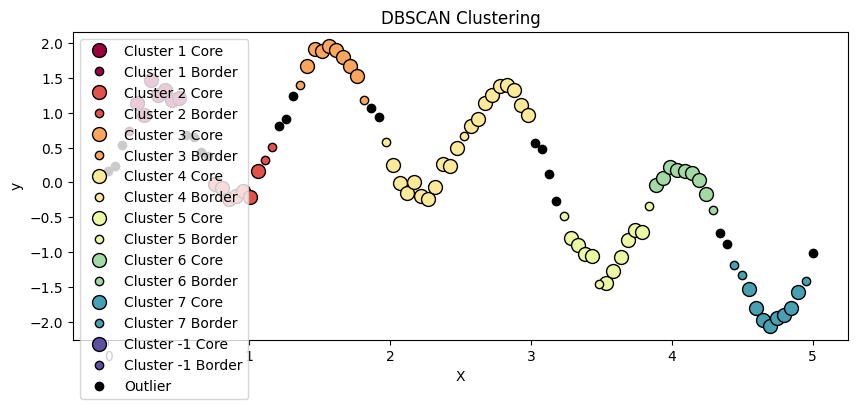

In [ ]:
# Parameters
r = 0.4  # Radius for neighborhood
minPts = 5  # Minimum points to form a dense region

# Initialize and fit DBSCAN
dbscan = DBSCAN(r=r, minPts=minPts)
labels = dbscan.fit(data)

# Plot results
plt.figure(figsize=(10, 4))
unique_labels = set([label[0] for label in labels])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = [label[0] == k for label in labels]
    xy = data[class_member_mask]
    types = [label[1] for label in labels if label[0] == k]

    core_mask = [t == 'core' for t in types]
    border_mask = [t == 'border' for t in types]

    plt.plot(xy[core_mask, 0], xy[core_mask, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label=f'Cluster {k} Core')

    plt.plot(xy[border_mask, 0], xy[border_mask, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Cluster {k} Border')

outlier_mask = [label[0] == -1 for label in labels]
xy_outliers = data[outlier_mask]
plt.plot(xy_outliers[:, 0], xy_outliers[:, 1], 'o', markerfacecolor='k',
         markeredgecolor='k', markersize=6, label='Outlier')

plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

In [ ]:
labels

array([(-1, 'outlier'), (-1, 'outlier'), (-1, 'outlier'), (1, 'border'),
       (1, 'core'), (1, 'core'), (1, 'core'), (1, 'core'), (1, 'core'),
       (1, 'core'), (1, 'core'), (-1, 'outlier'), (-1, 'outlier'),
       (-1, 'outlier'), (-1, 'outlier'), (2, 'core'), (2, 'core'),
       (2, 'core'), (2, 'core'), (2, 'core'), (2, 'core'), (2, 'core'),
       (2, 'border'), (2, 'border'), (-1, 'outlier'), (-1, 'outlier'),
       (-1, 'outlier'), (3, 'border'), (3, 'core'), (3, 'core'),
       (3, 'core'), (3, 'core'), (3, 'core'), (3, 'core'), (3, 'core'),
       (3, 'core'), (3, 'border'), (-1, 'outlier'), (-1, 'outlier'),
       (4, 'border'), (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (4, 'border'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (-1, 'outlier'), (-1, 'outlier'), (-1, 'outlier'),
       (-